In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

In [141]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

Method to fit model and get predicted values

In [142]:
def model(X,Y):
    model = sm.OLS(Y,sm.add_constant(X))
    results = model.fit()
    print(results.summary())
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=10,test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print("****Score*********"+ str(lr.score(X_test,y_test)))
    print("****Intercept*****"+str(lr.intercept_))
    print("****Coefficient***"+str(lr.coef_))
    predictions =lr.predict(X_test)
    pred_df =pd.DataFrame({'y_test':y_test,'Predictions':predictions})
    return pred_df

In [143]:
df = pd.read_csv('insurance.csv')

In [192]:
df.shape

(1338, 5)

In [144]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


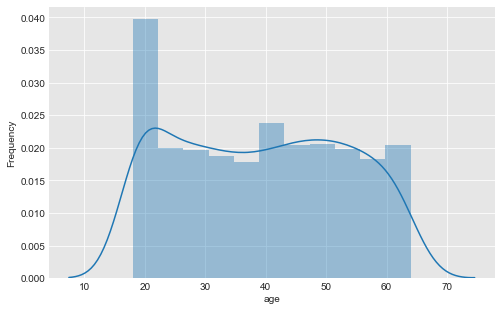

In [145]:
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(df['age'])
ax.set_ylabel('Frequency')
plt.show()

**Observations:**
Young people took more health insurances than older. It is effecting dependent variable.

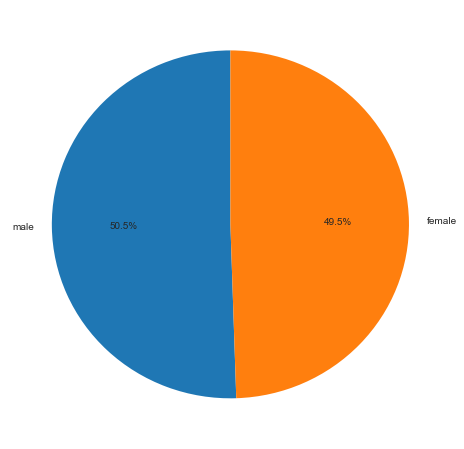

In [146]:
fig = plt.figure(figsize=(8,8))
df2=pd.DataFrame(df['sex'].value_counts())
plt.pie(df2['sex'],autopct='%1.1f%%',labels=df2.index,startangle=90)
plt.show()

**Observations:**
There was no effect on output with sex variable as it is equally distubuted. It is not effecting dependent variable.

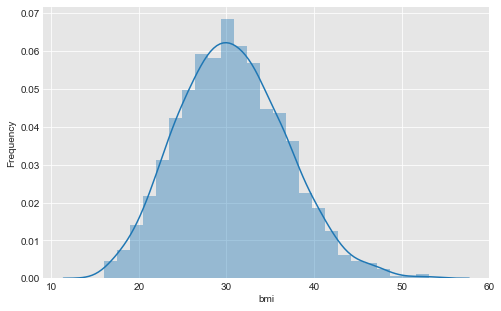

In [147]:
fig = plt.figure(figsize=(8,5))
ax = sns.distplot(df['bmi'])
ax.set_ylabel('Frequency')
plt.show()

**Observations:**
* Health insurances were high when bmi closes to 30. It is effecting dependent variable.

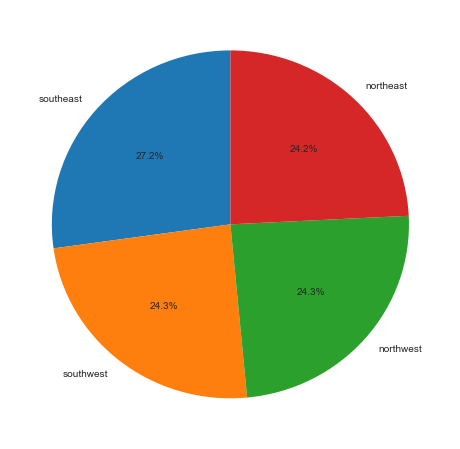

In [148]:
fig = plt.figure(figsize=(8,8))
df3=pd.DataFrame(df['region'].value_counts())
plt.pie(df3['region'],autopct='%1.1f%%',labels=df3.index,startangle=90)
plt.show()

**Observations:**
There was no effect on output with region variable as it is equally distubuted. It is not effecting dependent variable.

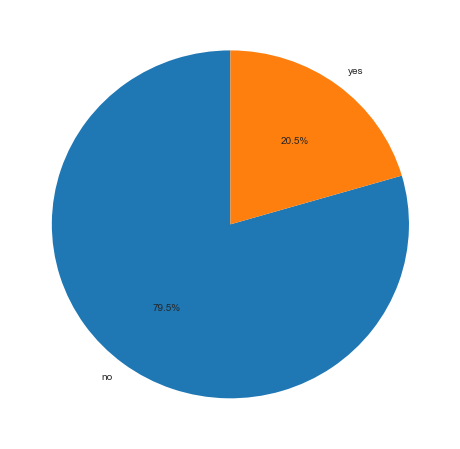

In [149]:
fig = plt.figure(figsize=(8,8))
df4=pd.DataFrame(df['smoker'].value_counts())
plt.pie(df4['smoker'],autopct='%1.1f%%',labels=df4.index,startangle=90)
plt.show()

**Observations:**
* non-smokers took more Health insurances than smoker. It is effecting dependent variable.

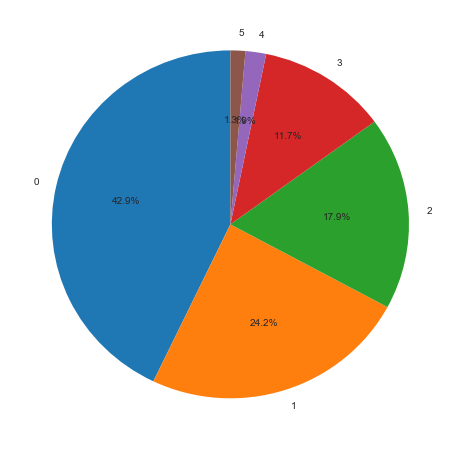

In [150]:
fig = plt.figure(figsize=(8,8))
df5=pd.DataFrame(df['children'].value_counts())
plt.pie(df5['children'],autopct='%1.1f%%',labels=df5.index,startangle=90)
plt.show()

**Observations:**
* Member without children took more Health insurances. It is effecting dependent variable.

<Figure size 576x576 with 0 Axes>

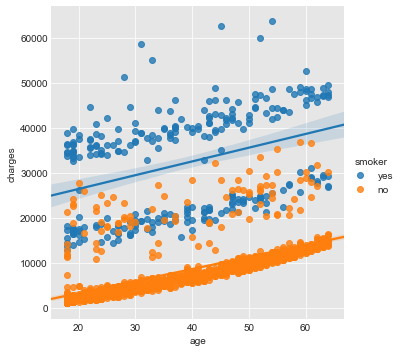

In [151]:
fig = plt.figure(figsize=(8,8))
sns.lmplot(x='age',y='charges',data=df,hue='smoker')
plt.show()

**Observations:**
* age is correlated with output irrespective of smoker or non-smoker

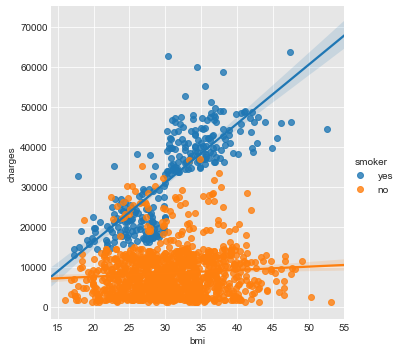

In [152]:
sns.lmplot(x='bmi',y='charges',data=df,hue='smoker')

**Observations:**
* bmi is highly correlated with output when person is smoker
* bmi is not correlated with output when person is nonsmoker

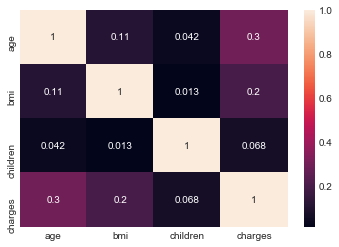

In [153]:
sns.heatmap(df.corr(),annot=True)

**Observations:**
* There was no stong correlation between variables

In [154]:
df.drop(labels=['region','sex'],axis=1,inplace=True) #dropping sex and region as it not impacting output

In [155]:
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [156]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [157]:
insurance_df = pd.get_dummies(data=df,columns=['smoker'],drop_first=True)
insurance_df['Charges']=insurance_df['charges']
insurance_df.drop(labels='charges',inplace=True,axis=1)

In [158]:
insurance_df.head()

,age,bmi,children,smoker_yes,Charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


**Before going to create a model lets find which variable effects output the most.**

In [159]:
def model_params(X,Y) :
    col = X.name
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    rsq = round(results.rsquared,4)
    rsquared[col]=rsq
    adj_rsq = round(results.rsquared_adj,4)
    adj_rsquared[col]=adj_rsq
    pvalue = round(results.pvalues,4)
    pvalues[col]=pvalue[1]
cols= insurance_df.iloc[:,:-1].columns.values
y = insurance_df.iloc[:,-1]
pvalues = {}
rsquared = {}
adj_rsquared = {}
for i in range(0,len(cols)) :
    model_params(insurance_df[cols[i]],y)
df_params = pd.DataFrame(np.row_stack([pd.DataFrame(rsquared,index=[0]),pd.DataFrame(adj_rsquared,index=[0]),pd.DataFrame(pvalues,index=[0])]),columns=cols,index=['r_sq','adj_rsq','pvalue'])

In [160]:
df_params

,age,bmi,children,smoker_yes
r_sq,0.0894,0.0393,0.0046,0.6198
adj_rsq,0.0887,0.0386,0.0039,0.6195
pvalue,0.0000,0.0000,0.0129,0.0000


**Observations:**
* If we are obsering r_seq & adj_rsq values, smoke variable effects dependent variable the most and it is the most important variable to keep in our model.

**Model 1:**
* Create model with full data

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        01:14:24   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

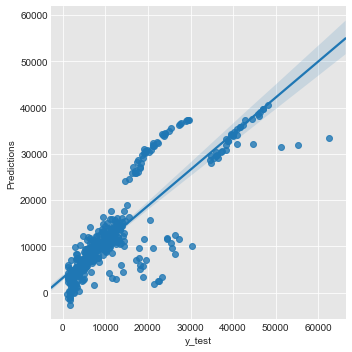

In [161]:
X =insurance_df.iloc[:,:-1]
Y = insurance_df.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we didnot see much accuracy when we are predicting the model with full data.
* model score: 0.7166354165086463

**Model 2:**
* Removing outliers in data

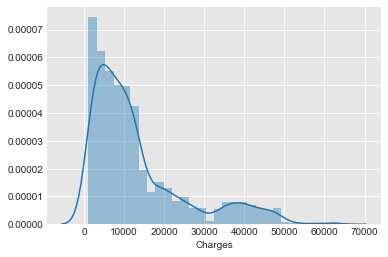

In [162]:
sns.distplot(insurance_df['Charges'])

**Observations:**
* Insurance Charges density reaches to minumum when charage is 30k.
* Insurance Charges density starts increasing after 30k
* Hence devide dataset into 2 parts i.e 1-30k is one part and 30k to 50k is another part.

In [163]:
insurance_df1 = insurance_df[insurance_df['Charges']<=30000] #below 30k charges
insurance_df2 = insurance_df[insurance_df['Charges']>30000] #above 30k charges

**Model 2.1**
* Insurance charges below 30k

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     482.8
Date:                Sun, 26 Aug 2018   Prob (F-statistic):          6.72e-246
Time:                        01:14:25   Log-Likelihood:                -11432.
No. Observations:                1176   AIC:                         2.287e+04
Df Residuals:                    1171   BIC:                         2.290e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2634.9358    691.460     -3.811      0.0

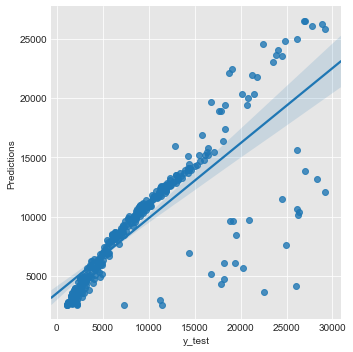

In [164]:
X =insurance_df1.iloc[:,:-1]
Y = insurance_df1.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

Remove uneffected variable 'bmi'(p>0.05)

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     643.6
Date:                Sun, 26 Aug 2018   Prob (F-statistic):          3.60e-247
Time:                        01:14:25   Log-Likelihood:                -11432.
No. Observations:                1176   AIC:                         2.287e+04
Df Residuals:                    1172   BIC:                         2.289e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2116.7113    366.343     -5.778      0.0

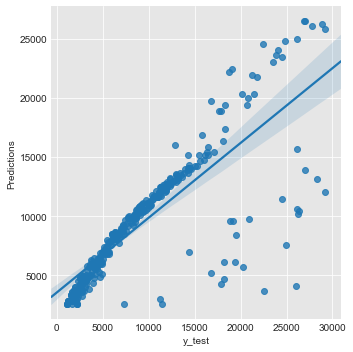

In [165]:
X =insurance_df1.iloc[:,:-1].drop(labels=['bmi'],axis=1)
Y = insurance_df1.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we didnot see much accuracy when we are predicting the model where charges <30k
* model score: 0.6571103825952687

**Model 2.2**
* Insurance charges above 30k

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     59.69
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.46e-30
Time:                        01:14:26   Log-Likelihood:                -1568.2
No. Observations:                 162   AIC:                             3146.
Df Residuals:                     157   BIC:                             3162.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1987.3428   2745.978      0.724      0.4

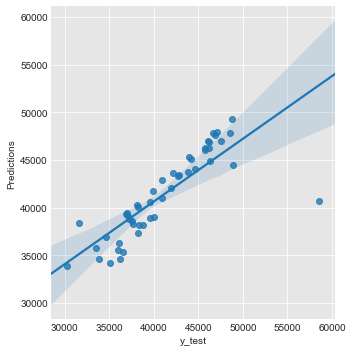

In [166]:
X =insurance_df2.iloc[:,:-1]
Y = insurance_df2.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

Remove uneffected variable children(p>0.05)

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     79.96
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.61e-31
Time:                        01:14:26   Log-Likelihood:                -1568.3
No. Observations:                 162   AIC:                             3145.
Df Residuals:                     158   BIC:                             3157.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1910.6344   2731.975      0.699      0.4

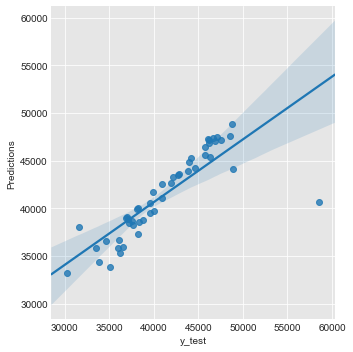

In [167]:
X =insurance_df2.iloc[:,:-1].drop(labels='children',axis=1)
Y = insurance_df2.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we didnot see much accuracy when we are predicting the model where charges >30k
* model score: 0.6899392539949609

**Model 3:**
* As smoke variable effects the output most. Lets devide the data by smoke or nonsmoke and remove outliers from it.

In [168]:
insurance_smoker = insurance_df[insurance_df['smoker_yes']==1]

In [169]:
insurance_nonsmoker = insurance_df[insurance_df['smoker_yes']==0]

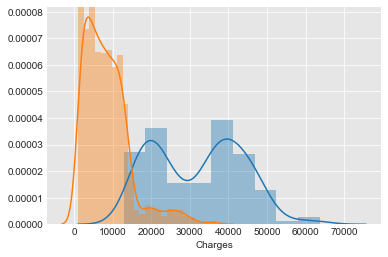

In [184]:
ax=sns.distplot(insurance_smoker['Charges'])
ax=sns.distplot(insurance_nonsmoker['Charges'])

**Model 3.1 : Smoker**

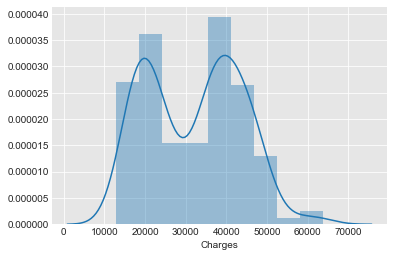

In [170]:
sns.distplot(insurance_smoker['Charges'])

* As we idetified earlier, devide < 30k into 1 set and above 30k to 55k into another

In [171]:
insurance_smoker1 = insurance_smoker[insurance_smoker['Charges']<=30000]
insurance_smoker2 = insurance_smoker[(insurance_smoker['Charges']>30000) & (insurance_smoker['Charges']<55000)]

**Model 3.1.1:** 
* Insurance charges less than 30k

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     304.7
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           2.23e-55
Time:                        01:14:27   Log-Likelihood:                -1049.1
No. Observations:                 122   AIC:                             2106.
Df Residuals:                     118   BIC:                             2117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4124   1078.688      0.040      0.9

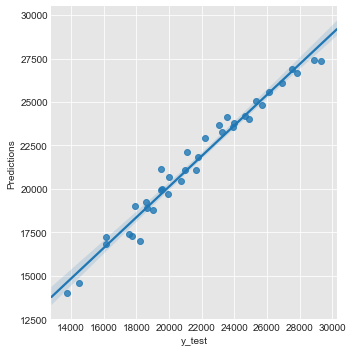

In [172]:
X =insurance_smoker1.iloc[:,:-1].drop(labels=['smoker_yes'],axis=1)
Y = insurance_smoker1.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we saw great accuracy when we are predicting the model using smoker and charges <30k
* model score: 0.9623848866708914

**Model 3.1.2:** 
* Insurance charges more than 30k

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           6.69e-45
Time:                        01:14:27   Log-Likelihood:                -1350.2
No. Observations:                 147   AIC:                             2708.
Df Residuals:                     143   BIC:                             2720.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.285e+04   1620.712      7.931      0.0

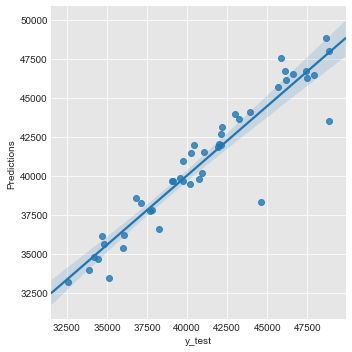

In [173]:
X =insurance_smoker2.iloc[:,:-1].drop(labels='smoker_yes',axis=1)
Y = insurance_smoker2.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

* Remove children(p>0.05) as it is not a effected variable

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           3.94e-46
Time:                        01:14:28   Log-Likelihood:                -1350.2
No. Observations:                 147   AIC:                             2706.
Df Residuals:                     144   BIC:                             2715.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.286e+04   1615.098      7.962      0.0

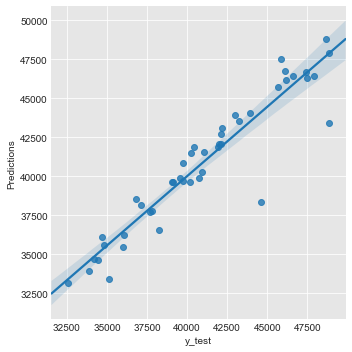

In [174]:
X =insurance_smoker2.iloc[:,:-1].drop(labels=['smoker_yes','children'],axis=1)
Y = insurance_smoker2.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we saw great accuracy when we are predicting the model using smoker and charges >30k
* model score: 0.8930673561678242

**Model 3.2 : Non-Smoker**

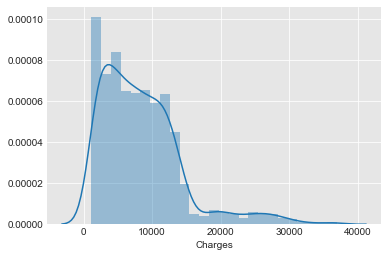

In [175]:
sns.distplot(insurance_nonsmoker['Charges'])

* Still we can see outliers in nonsmoker data. so, lets devide data. < 15k one set and > 15k another set

In [176]:
insurance_nonsmoker1 = insurance_nonsmoker[insurance_nonsmoker['Charges']<=15000]
insurance_nonsmoker2 = insurance_nonsmoker[insurance_nonsmoker['Charges']>15000]

In [177]:
insurance_nonsmoker1.shape

(973, 5)

In [178]:
insurance_nonsmoker2.shape

(91, 5)

**Model 3.2.1:** 
* Insurance charges less than 15k

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2382.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        01:14:29   Log-Likelihood:                -8376.1
No. Observations:                 973   AIC:                         1.676e+04
Df Residuals:                     969   BIC:                         1.678e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3220.1926    240.319    -13.400      0.0

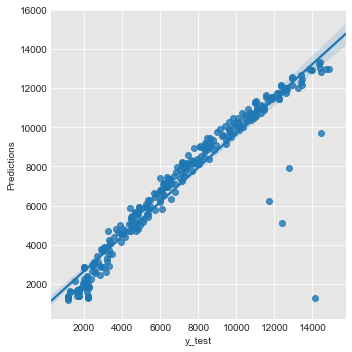

In [179]:
X =insurance_nonsmoker1.iloc[:,:-1].drop(labels='smoker_yes',axis=1)
Y = insurance_nonsmoker1.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

* Lets remove unwanted variable bmi(p>0.05)

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     3576.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        01:14:30   Log-Likelihood:                -8376.2
No. Observations:                 973   AIC:                         1.676e+04
Df Residuals:                     970   BIC:                         1.677e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3307.1262    131.118    -25.223      0.0

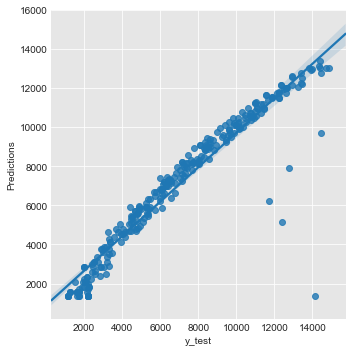

In [180]:
X =insurance_nonsmoker1.iloc[:,:-1].drop(labels=['smoker_yes','bmi'],axis=1)
Y = insurance_nonsmoker1.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we saw great accuracy when we are predicting the model using nonsmoker and charges <15k
* model score: 0.8987033216908792

**Model 3.2.2:** 
* Insurance charges more than 15k

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     3.011
Date:                Sun, 26 Aug 2018   Prob (F-statistic):             0.0344
Time:                        01:14:30   Log-Likelihood:                -903.12
No. Observations:                  91   AIC:                             1814.
Df Residuals:                      87   BIC:                             1824.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.497e+04   3367.193      7.417      0.0

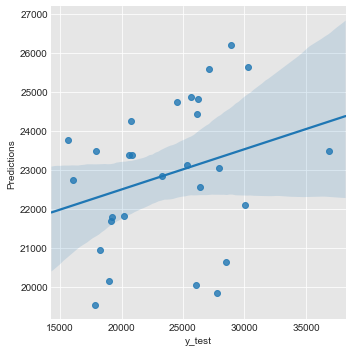

In [181]:
X =insurance_nonsmoker2.iloc[:,:-1].drop(labels='smoker_yes',axis=1)
Y = insurance_nonsmoker2.iloc[:,-1]
pred=model(X,Y)
sns.lmplot(x='y_test', y='Predictions',data=pred)
plt.show()

**Observations:**
* we didnot see accuracy when we are predicting the model using nonsmoker and charges >15k
* model score: 0.0423983608462829
* we can ignore these outliers and model.

**Total Accuracy : **average of models 3.1.1,3.1.2 and 3.2.1 accuracies together

In [194]:
round(np.array([0.96,0.89,0.90]).mean(),2)

0.92

**Outliers percentage:** number of records in model 3.2.2

In [199]:
round((91/1338)*100)

7

***Concluion:*** we achived 92% accurancy by loosing 7% ouliers in data.